## Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv('adult_with_headers (1).csv')
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Initial Data Exploration

In [2]:
print("DataFrame Head:")
print(df.head())

print("\nDataFrame Info:")
df.info()

print("\nDescriptive Statistics:")
print(df.describe(include='all'))

print("\nMissing Values:")
print(df.isnull().sum())

DataFrame Head:
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   Unit

## Handle Missing Values

In [3]:
print("Unique values for 'workclass':", df['workclass'].unique())
print("Unique values for 'occupation':", df['occupation'].unique())
print("Unique values for 'native_country':", df['native_country'].unique())

Unique values for 'workclass': [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
Unique values for 'occupation': [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
Unique values for 'native_country': [' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [4]:
import numpy as np

for col in ['workclass', 'occupation', 'native_country']:
    df[col] = df[col].replace(' ?', np.nan)

print("Missing Values after '?' replacement:")
print(df.isnull().sum())

Missing Values after '?' replacement:
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


In [5]:
for col in ['workclass', 'occupation', 'native_country']:
    if df[col].isnull().any():
        mode_value = df[col].mode()[0] # Get the first mode if there are multiple
        df[col] = df[col].fillna(mode_value)

print("Missing Values after imputation:")
print(df.isnull().sum())


Missing Values after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


## Separate Feature Types

In [6]:
numerical_cols = []
categorical_cols = []

for col in df.columns:
    if df[col].dtype == 'int64':
        numerical_cols.append(col)
    elif df[col].dtype == 'object':
        categorical_cols.append(col)

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Categorical Columns: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


## Apply Standard Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_standard = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

print("First 5 rows of Standard Scaled DataFrame:")
print(df_scaled_standard.head())

First 5 rows of Standard Scaled DataFrame:
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  
3       -0.035429  
4       -0.035429  


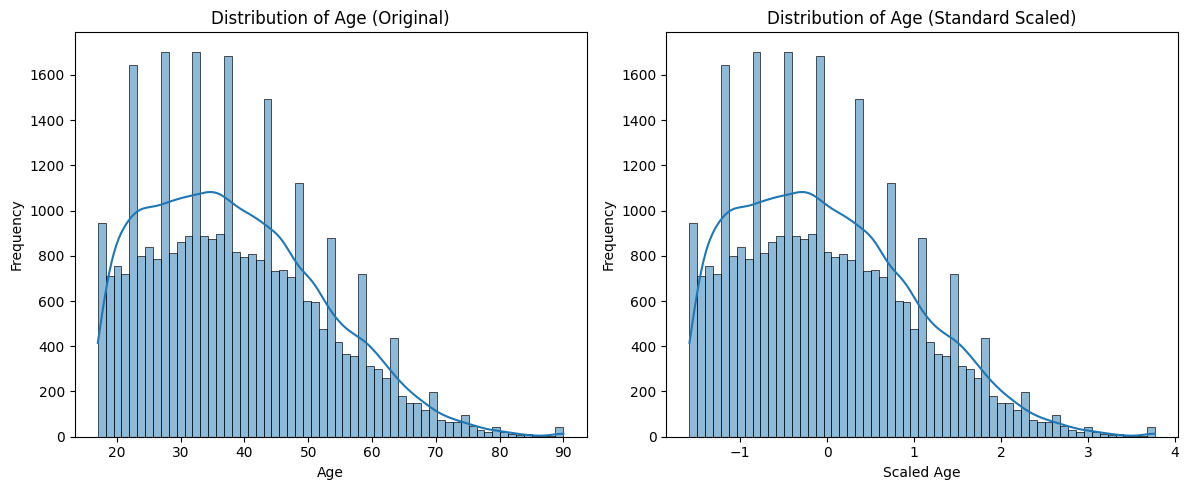

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age (Original)')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_scaled_standard['age'], kde=True)
plt.title('Distribution of Age (Standard Scaled)')
plt.xlabel('Scaled Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Apply Min-Max Scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
df_scaled_minmax = pd.DataFrame(minmax_scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

print("First 5 rows of Min-Max Scaled DataFrame:")
print(df_scaled_minmax.head())

First 5 rows of Min-Max Scaled DataFrame:
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000           0.0   

   hours_per_week  
0        0.397959  
1        0.122449  
2        0.397959  
3        0.397959  
4        0.397959  


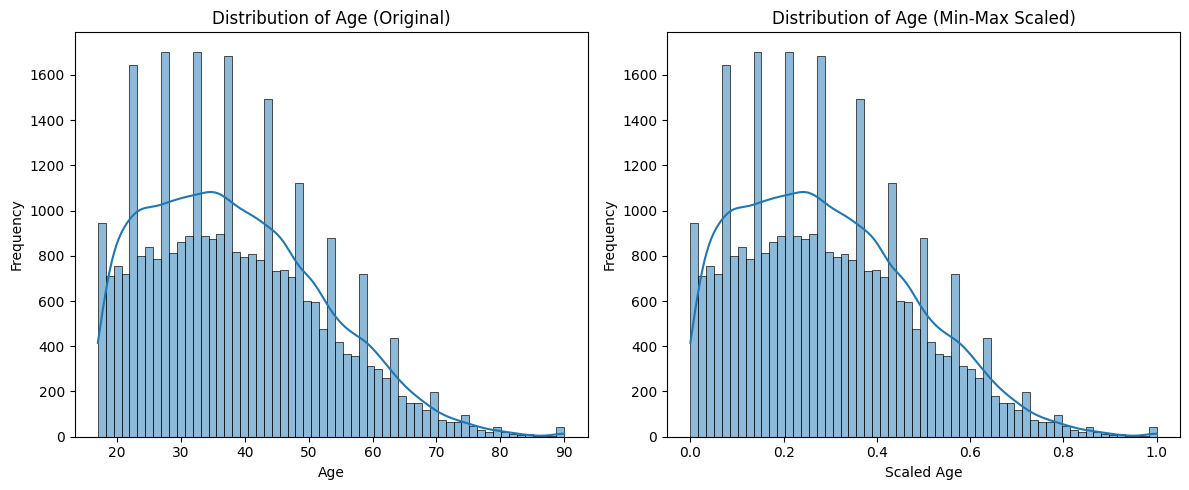

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age (Original)')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_scaled_minmax['age'], kde=True)
plt.title('Distribution of Age (Min-Max Scaled)')
plt.xlabel('Scaled Age')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Apply One-Hot and Label Encoding

In [11]:
for col in categorical_cols:
    print(f"Column '{col}': {df[col].nunique()} unique values")


Column 'workclass': 8 unique values
Column 'education': 16 unique values
Column 'marital_status': 7 unique values
Column 'occupation': 14 unique values
Column 'relationship': 6 unique values
Column 'race': 5 unique values
Column 'sex': 2 unique values
Column 'native_country': 41 unique values
Column 'income': 2 unique values


In [12]:
from sklearn.preprocessing import OneHotEncoder

onehot_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']

# Initialize OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit and transform the selected categorical columns
df_encoded_ohe = pd.DataFrame(ohe.fit_transform(df[onehot_cols]), columns=ohe.get_feature_names_out(onehot_cols))

print("First 5 rows of One-Hot Encoded DataFrame (sample of columns):")
print(df_encoded_ohe.head())

First 5 rows of One-Hot Encoded DataFrame (sample of columns):
   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Never-worked  \
0                     0.0                   0.0                      0.0   
1                     0.0                   0.0                      0.0   
2                     0.0                   0.0                      0.0   
3                     0.0                   0.0                      0.0   
4                     0.0                   0.0                      0.0   

   workclass_ Private  workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  \
0                 0.0                      0.0                          0.0   
1                 0.0                      0.0                          1.0   
2                 1.0                      0.0                          0.0   
3                 1.0                      0.0                          0.0   
4                 1.0                      0.0                          0.0   

   wo

In [13]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['sex', 'income']

df_encoded_label = df[label_cols].copy() # Create a copy to avoid SettingWithCopyWarning

# Initialize LabelEncoder
le = LabelEncoder()

for col in label_cols:
    df_encoded_label[col] = le.fit_transform(df_encoded_label[col])

print("First 5 rows of Label Encoded DataFrame:")
print(df_encoded_label.head())

First 5 rows of Label Encoded DataFrame:
   sex  income
0    1       0
1    1       0
2    1       0
3    1       0
4    0       0


## Create New Features

In [14]:
df['capital_diff'] = df['capital_gain'] - df['capital_loss']
df['is_married'] = df['marital_status'].apply(lambda x: 1 if 'Married-civ-spouse' in x else 0)

print("First 5 rows with new features:")
print(df[['capital_gain', 'capital_loss', 'capital_diff', 'marital_status', 'is_married']].head())

First 5 rows with new features:
   capital_gain  capital_loss  capital_diff       marital_status  is_married
0          2174             0          2174        Never-married           0
1             0             0             0   Married-civ-spouse           1
2             0             0             0             Divorced           0
3             0             0             0   Married-civ-spouse           1
4             0             0             0   Married-civ-spouse           1


## Discuss Scaling Techniques

## Discuss Encoding Techniques

## Feature Engineering - Transform Skewed Feature

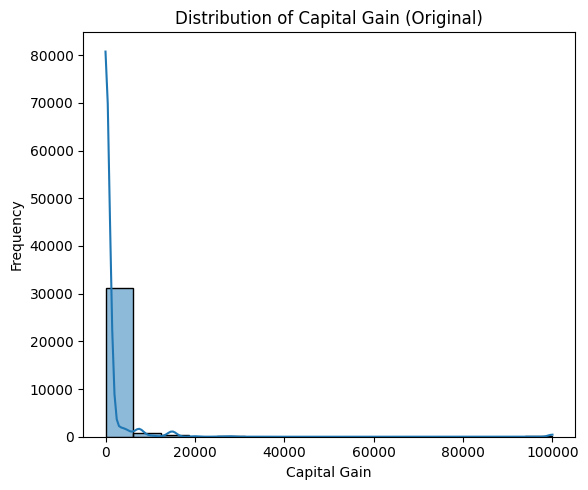

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(6, 5))
sns.histplot(df['capital_gain'], kde=True)
plt.title('Distribution of Capital Gain (Original)')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

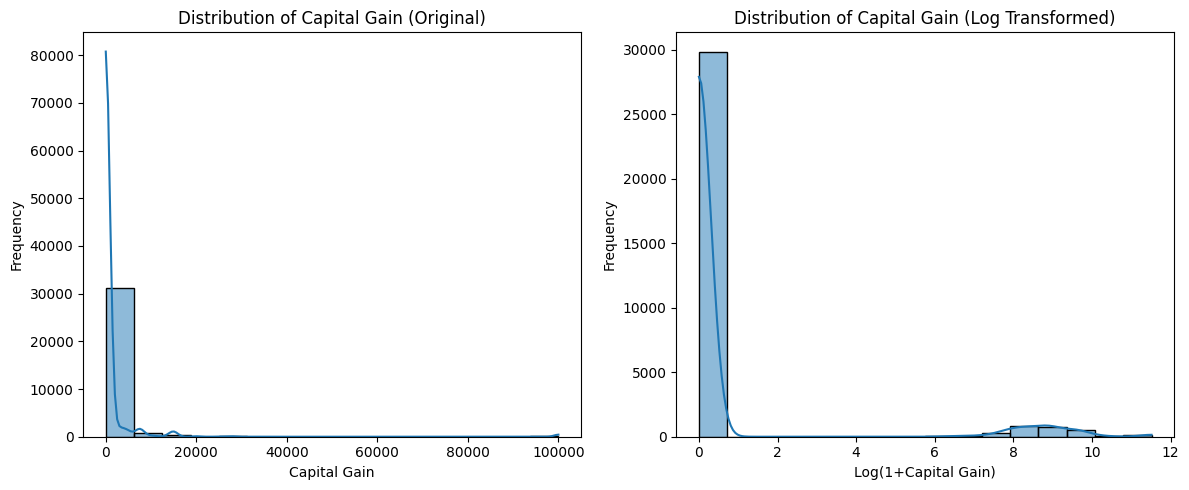

In [16]:
df['capital_gain_transformed'] = np.log1p(df['capital_gain'])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['capital_gain'], kde=True)
plt.title('Distribution of Capital Gain (Original)')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['capital_gain_transformed'], kde=True)
plt.title('Distribution of Capital Gain (Log Transformed)')
plt.xlabel('Log(1+Capital Gain)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()